In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd

from PIL import Image

import matplotlib.pyplot as plt

In [2]:
from dataConverter import convert_df_to_json, get_image_information

In [3]:
root_data = "../blyncsy_signs/tdot"
root_image = os.path.join(root_data, 'images')

In [4]:
# get tsv files
tsv_files = glob('tdot_label_tsv/*.txt')

In [5]:
df = [pd.read_csv(fl, delimiter='\t') for fl in tsv_files]
df = pd.concat(df, axis=0)
# df = df.reset_index(drop=True)
df = df[df['class']!='skip']
print(len(df))
df.head()

1803


,filename,class,bbox,x0,y0,w,h,area
0,frame_4fddc8e463182d0349abf72c526f1abb.jpg,d1-3,"682,449,47,23",682,449,47,23,1081
1,frame_4fddc8e463182d0349abf72c526f1abb.jpg,d1-3,"641,445,39,29",641,445,39,29,1131
2,frame_4fddcd553440a0e4ebe23536aba37a7b.jpg,d1-3,"500,382,171,85",500,382,171,85,14535
3,frame_4fe6916685acbb2a4f5a2f1be534fb86.jpg,d1-3,"626,354,26,27",626,354,26,27,702
4,frame_4fe6916685acbb2a4f5a2f1be534fb86.jpg,d1-3,"601,357,22,22",601,357,22,22,484


In [7]:
len(df['filename'].unique())

620

Mean:   53.0
SD:     53.0
Median: 38.0
Min:    6
Max:    648


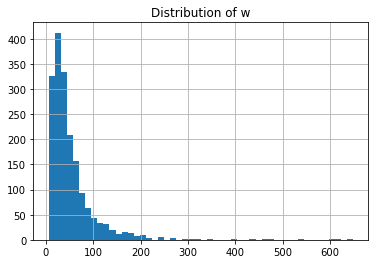

In [17]:
var = 'w'
print(f"Mean:   {df[var].mean().round()}")
print(f"SD:     {df[var].std().round()}")
print(f"Median: {np.median(df[var]).round()}")
print(f"Min:    {df[var].min()}")
print(f"Max:    {df[var].max()}")

df[var].hist(bins=50)
plt.title(f"Distribution of {var}")
plt.show()

In [18]:
df[var].quantile(.9)

103.0

In [19]:
categories = sorted(df['class'].unique())
categories.remove('bil')
len(categories)

89

In [20]:
category_encoder = {c: 0 if c=='none' else 1 for c in categories}

In [21]:
json_df = convert_df_to_json(df, root_image, category_encoder=category_encoder)

In [22]:
# write json file
import json
with open('sign_tdot.json', 'w') as fp:
    json.dump(json_df, fp)

In [23]:
128 + 16 

144

In [30]:
144/2

72.0

In [36]:
np.mean([20, 64])

42.0

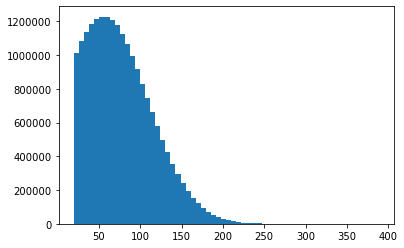

In [62]:
var = np.concatenate([np.random.randint(16, 26, size=250), np.random.randint(26, 68, size=500), np.random.randint(68, 512, size=250)])

x = plt.hist(gen.rvs(20000000), bins=60)

array([162.53496588,  96.82653986,  93.96643085,  83.60368731,
        52.16053421, 134.0381857 , 115.8185041 ,  86.06624188,
        49.47285368,  38.91479991,  26.12887147,  58.35705644,
        64.72999678, 122.75858011, 181.81557111,  83.64839081,
       114.66065656,  90.80264944,  79.41066188, 106.53267944,
        52.00031964, 141.38407587,  83.26700787,  53.30488691,
        53.70242835,  62.36478692,  86.35239922,  46.1360815 ,
        52.20961154,  52.22443783, 127.88340256,  75.04885253,
        66.78327041,  34.26734154, 170.06712237, 182.22480373,
        50.42324558,  60.16372203, 119.69022595, 117.30891505,
        51.40596538,  56.27965444, 112.39812857,  83.60174179,
        82.54570986,  28.8802842 ,  61.98052034,  31.87319227,
        29.29670363, 171.10823677,  26.64140984,  57.91216462,
        78.33749222,  93.25490187, 109.84757316,  39.7003936 ,
        97.931042  ,  51.5523351 , 100.0211711 ,  92.41301345,
        92.27440086,  67.80174447,  70.94422029, 129.82

In [143]:
def crop_bbox_image(im, bbox, square=False, padding=None):
    
    # unpack image dimensions
    w_im, h_im = im.size
    # unpack bbox dimensions
    left, top, width, height = bbox
    
    # crop sqaure image
    if square:
        if padding:
            left = max(0, left-padding)
            top = max(0, top-padding)
            width = min(w_im, width+padding*2)
            height = min(h_im, height+padding*2)


        crop_side = max(width, height)
        crop_side = min(crop_side, w_im, h_im)
        diff = abs(width - height)
        diff2 = diff//2

        if width > height:
            leftc = left
            topc = max(0, top - diff2)
            if topc + crop_side > h_im:
                topc = h_im - crop_side

        elif width < height:
            topc = top
            leftc = max(0, left - diff2)
            if leftc + crop_side > w_im:
                leftc = w_im - crop_side

        else:
            leftc, topc = left, top

        crop_dim = (leftc, topc, leftc+crop_side, topc+crop_side)
    
    # crop image to bbox dimensions
    else:
        crop_dim = (left, top, left+width, top+height)

    imcrop = im.copy()
    
    return imcrop.crop(crop_dim)

In [144]:
root_data = "../blyncsy_signs/tdot"
root_image = os.path.join(root_data, 'images')

In [145]:
# get tsv files
tsv_files = glob('tdot_label_tsv/*.txt')

In [147]:
df = [pd.read_csv(fl, delimiter='\t') for fl in tsv_files]
df = pd.concat(df, axis=0)
# df = df.reset_index(drop=True)
print(len(df))
df.head()

767


,filename,class,bbox,x0,y0,w,h,area
0,11.29.13.29.42.jpg,m3-3,"715,302,23,11",715,302,23,11,253
1,11.29.13.29.42.jpg,m3-1,"739,307,21,11",739,307,21,11,231
2,11.29.13.29.42.jpg,m1-4,"714,310,25,21",714,310,25,21,525
3,11.29.13.29.42.jpg,m1-4,"736,318,25,19",736,318,25,19,475
4,11.29.13.29.43.jpg,m3-3,"835,307,35,18",835,307,35,18,630


In [148]:
df['filename']

0                              11.29.13.29.42.jpg
1                              11.29.13.29.42.jpg
2                              11.29.13.29.42.jpg
3                              11.29.13.29.42.jpg
4                              11.29.13.29.43.jpg
                          ...                    
181    frame_a99240c65d0a696ee8f18b167e0258c3.jpg
182    frame_a992efdda8cae688f7afacd2e56625e4.jpg
183    frame_a992efdda8cae688f7afacd2e56625e4.jpg
184    frame_a9ab070d2e1bb596fd8567e519bcda60.jpg
185    frame_a9af4b351669d0583ed14c194f059dac.jpg
Name: filename, Length: 767, dtype: object

In [72]:
# loop through each image file in the dataframe
for fl in df['filename'].unique():
    break

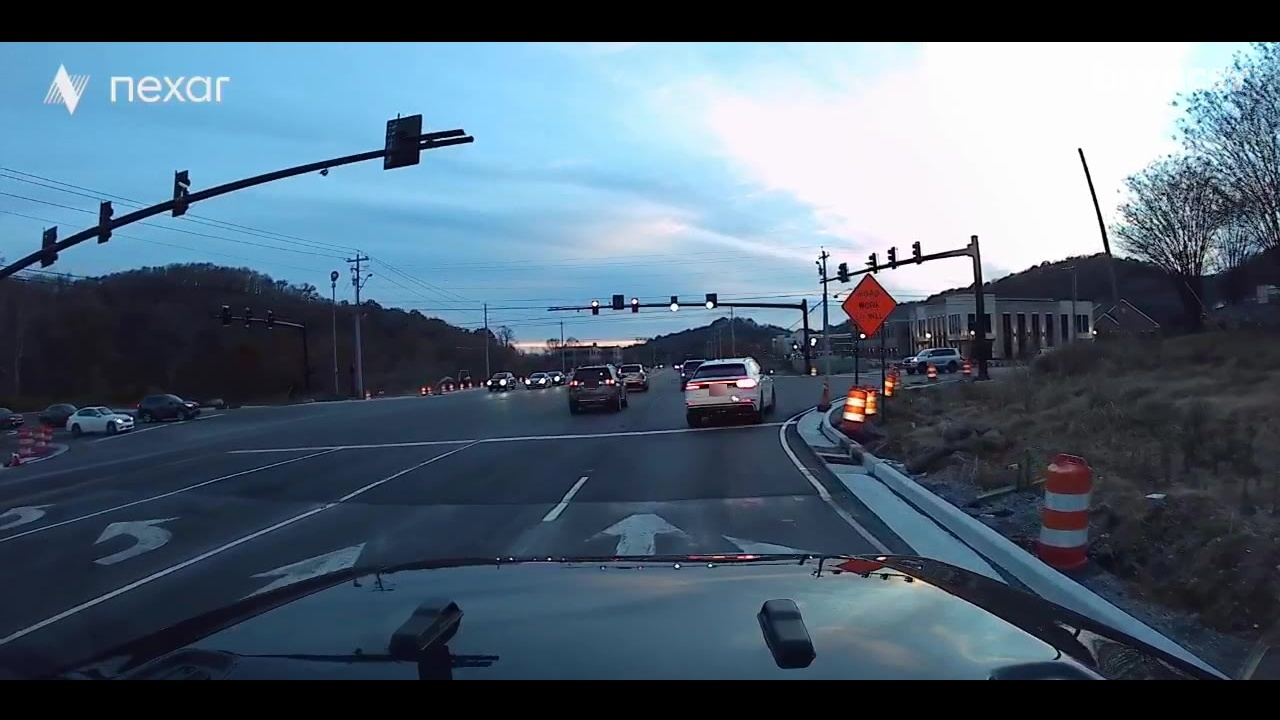

In [149]:
idx = np.random.randint(len(df))
# fl = df['filename'][idx]
fl='frame_a9af4b351669d0583ed14c194f059dac.jpg'

# open the original image
im = Image.open(os.path.join(root_image, fl))
# initialize variables to store crop information
im_crop, im_class, out_name = [], [], []
# loop over each sign in the image
for i, row in df[df['filename']==fl].iterrows():
    # get bounding box information
    bbox = row[['x0', 'y0', 'w', 'h']].values
    # crop the image
    im_crop.append(crop_bbox_image(im, bbox, square=True, padding=None))
    # record the class
    im_class.append(row['class'])
    # record the out name
    out_name.append(f"{fl[:-4]}_{row['class']}_{i}.jpg")

im

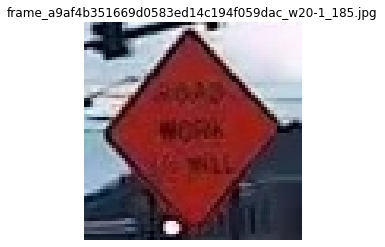

In [150]:
for i, img in enumerate(im_crop):
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(out_name[i])
    plt.show()

In [2]:
m15_paths = sorted(glob('./Synthetic/synth_classification/m1-5/*'))

In [11]:
# image_names, labels = [], []
# for i, p in enumerate(m15_paths):
#     img = np.array(Image.open(p))
#     fl_name = os.path.basename(p)
#     plt.imshow(img)
#     plt.show(block=False)
#     lab = input('label: ')
#     plt.close()
    
#     if (i+1)%50 == 0:
#         print(f"{i+1}/{len(m15_paths)+1}")
    
#     image_names.append(fl_name)
#     labels.append(lab)

In [6]:
# df_m15 = pd.DataFrame({'image name': image_names, 'label': labels})
# df_m15['label binary'] = df_m15['label'].apply(lambda x: 1 if x=='1' else 0)
# # df_m15.to_csv('m1-5_info.csv', index=False)

In [12]:
df_m15 = df_m15[df_m15['label binary']==1]

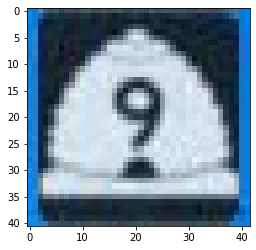

In [91]:
p = os.path.join('./Synthetic/synth_classification/m1-5', df_m15.sample(1)['image name'].values[0])
img = np.array(Image.open(p))
plt.imshow(img)
plt.show()

'./Synthetic/synth_classification/m1-5/synthClass_61250_0002.jpg'

In [9]:
import json

In [54]:
# read coco formatted json
with open('udot_cvat.json') as fl:
    ann_file = json.load(fl)
ann_file.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [55]:
# get annotation info
annotations_info = ann_file['annotations']

# change all categories to be one class (sign/no sign)
for i in range(len(annotations_info)):
    annotations_info[i]['category_id'] = 1

# get the valid image ID's
image_ids = np.unique([ann['image_id'] for ann in annotations_info])
# subset valid images
image_info = ann_file['images'][:image_ids.max()]
# change file_name attribute to be base filename
for i in range(len(image_info)):
    image_info[i]['file_name'] = os.path.basename(image_info[i]['file_name'])

# replace information in original file
ann_file['annotations'] = annotations_info
ann_file['images'] = image_info

In [56]:
with open('udot_cvat_edit.json', 'w') as fp:
    json.dump(ann_file, fp)